# **Funções de Ativação**

In [ ]:
import torch
from torch import nn

[-2.         -1.87755102 -1.75510204 -1.63265306 -1.51020408 -1.3877551
 -1.26530612 -1.14285714 -1.02040816 -0.89795918 -0.7755102  -0.65306122
 -0.53061224 -0.40816327 -0.28571429 -0.16326531 -0.04081633  0.08163265
  0.20408163  0.32653061  0.44897959  0.57142857  0.69387755  0.81632653
  0.93877551  1.06122449  1.18367347  1.30612245  1.42857143  1.55102041
  1.67346939  1.79591837  1.91836735  2.04081633  2.16326531  2.28571429
  2.40816327  2.53061224  2.65306122  2.7755102   2.89795918  3.02040816
  3.14285714  3.26530612  3.3877551   3.51020408  3.63265306  3.75510204
  3.87755102  4.        ]
-2.6


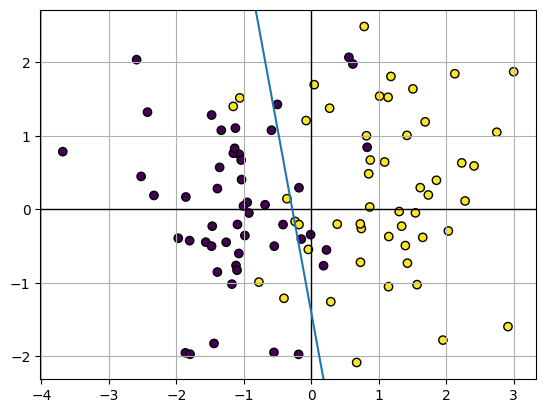

In [ ]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(46)

#X -> armazena todas as dimensões do dado, neste casos 2 features(x e y), ou seja os pontos em cada coordenada
#Y -> armazena os labels, se pretence a classe 0 ou 1
X, Y = make_classification(n_features=2, n_redundant=0, n_informative=1, n_clusters_per_class=1)

def plotmodel(w1, w2, b):

  plt.scatter(X[:, 0], X[:, 1], marker='o', c=Y, edgecolor='k')

  xmin, xmax = plt.gca().get_xlim()
  ymin, ymax = plt.gca().get_ylim()

  x = np.linspace(-2, 4, 50)
  y = (-w1 * x -b)/w2
  print(x)

  plt.axvline(0, -1, 1, color = 'k', linewidth = 1)
  plt.axhline(0, -2, 4, color = 'k', linewidth = 1)
  plt.plot(x, y)
  plt.grid(True)

  plt.xlim(xmin, xmax)
  plt.ylim(ymin, ymax)

w1 = 5
w2 = 1
#Uso o bias para mover a reta
b = 1.4

plotmodel(w1,w2,b)

#Sabendo o lado + e - da minha reta
p = (-1,1)
print(w1*p[0] + w2*p[1] + b)
#valores - em relação a reta é azul

Utilizando o Pytorch

In [ ]:
#in_features=2, out_features=1
perceptron = nn.Linear(2, 1)
#Utilizando a função sigmóide como função de ativação
sigmoide = nn.Sigmoid()

#Definindo os pesos
#Tem que ter mais de uma dimensão, por isso fica [[]]
perceptron.weight = nn.Parameter(torch.Tensor([[w1,w2]]))
perceptron.bias = nn.Parameter(torch.Tensor([1.4]))
#w1 = 5
#w2 = 1
#b = -0.4

print(perceptron.weight.data)
print(perceptron.bias.data)

tensor([[5., 1.]])
tensor([1.4000])


[-2.         -1.87755102 -1.75510204 -1.63265306 -1.51020408 -1.3877551
 -1.26530612 -1.14285714 -1.02040816 -0.89795918 -0.7755102  -0.65306122
 -0.53061224 -0.40816327 -0.28571429 -0.16326531 -0.04081633  0.08163265
  0.20408163  0.32653061  0.44897959  0.57142857  0.69387755  0.81632653
  0.93877551  1.06122449  1.18367347  1.30612245  1.42857143  1.55102041
  1.67346939  1.79591837  1.91836735  2.04081633  2.16326531  2.28571429
  2.40816327  2.53061224  2.65306122  2.7755102   2.89795918  3.02040816
  3.14285714  3.26530612  3.3877551   3.51020408  3.63265306  3.75510204
  3.87755102  4.        ]


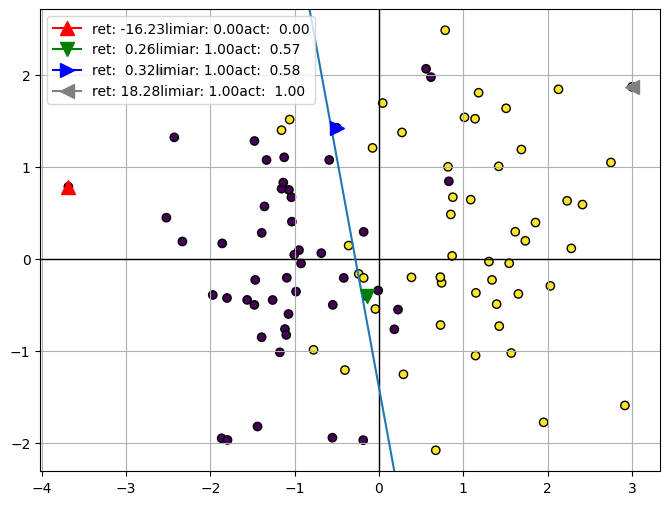

In [ ]:
markers = ['^', 'v', '>', '<']
colors = ['r','g','b','gray']

plt.figure(figsize=(8,6))
plotmodel(w1,w2,b)
#Selecionando pontos específicos da distribuição(índices 17, 21, 43 e 66)
#Para cada iteração, k receberá o índice do elemento na lista e index receberá o valor desse elemento.
for k, index in enumerate([17, 21, 43, 66]):
  x = torch.Tensor(X[index])
  #Alimentando o perceptron com as coordenadas obtidas
  #Me retornará o ret(retorno)
  ret = perceptron(x)
  #Passando a variável ret para a função de ativação
  act = sigmoide(ret)

  act_limiar = 0 if ret.data < 0 else 1

  label = 'ret: {:5.2f}'.format(ret.data.numpy()[0]) + 'limiar: {:4.2f}'.format(act_limiar) + 'act: {:5.2f}'.format(act.data.numpy()[0])

  plt.plot(x[0],x[1], marker=markers[k], color=colors[k], markersize=10, label=label)

plt.legend()
plt.show()

#Se for + é uma classe, se for - será outra classe
#Próximo de 0, está na zona de confusão